	Análisis descriptivo de los datos. 

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [13]:
# Cargar el conjunto de datos
df = pd.read_csv('./file/Admission_Predict_Ver1.1.csv')

# Renombrar las columnas para facilitar su uso
df = df.rename(columns={'Serial No.': 'no',
                        'GRE Score': 'gre',
                        'TOEFL Score': 'toefl',
                        'University Rating': 'rating',
                        'SOP': 'sop',
                        'LOR ': 'lor',
                        'CGPA': 'gpa',
                        'Research': 'research',
                        'Chance of Admit ': 'chance'})

# Eliminar la columna 'no' ya que es solo un identificador
df.drop(['no'], axis=1, inplace=True)

# Mostrar las primeras filas del dataset para revisión
print(df.head())



   gre  toefl  rating  sop  lor   gpa  research  chance
0  337    118       4  4.5  4.5  9.65         1    0.92
1  324    107       4  4.0  4.5  8.87         1    0.76
2  316    104       3  3.0  3.5  8.00         1    0.72
3  322    110       3  3.5  2.5  8.67         1    0.80
4  314    103       2  2.0  3.0  8.21         0    0.65


In [14]:
# Mostrar información básica del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gre       500 non-null    int64  
 1   toefl     500 non-null    int64  
 2   rating    500 non-null    int64  
 3   sop       500 non-null    float64
 4   lor       500 non-null    float64
 5   gpa       500 non-null    float64
 6   research  500 non-null    int64  
 7   chance    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB
None


In [15]:
# Estadísticas descriptivas del dataset
print(df.describe())


              gre       toefl      rating         sop        lor         gpa  \
count  500.000000  500.000000  500.000000  500.000000  500.00000  500.000000   
mean   316.472000  107.192000    3.114000    3.374000    3.48400    8.576440   
std     11.295148    6.081868    1.143512    0.991004    0.92545    0.604813   
min    290.000000   92.000000    1.000000    1.000000    1.00000    6.800000   
25%    308.000000  103.000000    2.000000    2.500000    3.00000    8.127500   
50%    317.000000  107.000000    3.000000    3.500000    3.50000    8.560000   
75%    325.000000  112.000000    4.000000    4.000000    4.00000    9.040000   
max    340.000000  120.000000    5.000000    5.000000    5.00000    9.920000   

         research     chance  
count  500.000000  500.00000  
mean     0.560000    0.72174  
std      0.496884    0.14114  
min      0.000000    0.34000  
25%      0.000000    0.63000  
50%      1.000000    0.72000  
75%      1.000000    0.82000  
max      1.000000    0.97000  


	Tratamiento de missing (si lo hay). 

In [16]:
df.isnull().sum()
# No hay datos faltantes o nulos en el dataset

gre         0
toefl       0
rating      0
sop         0
lor         0
gpa         0
research    0
chance      0
dtype: int64

	Realizar los análisis previos que consideres oportunos. 

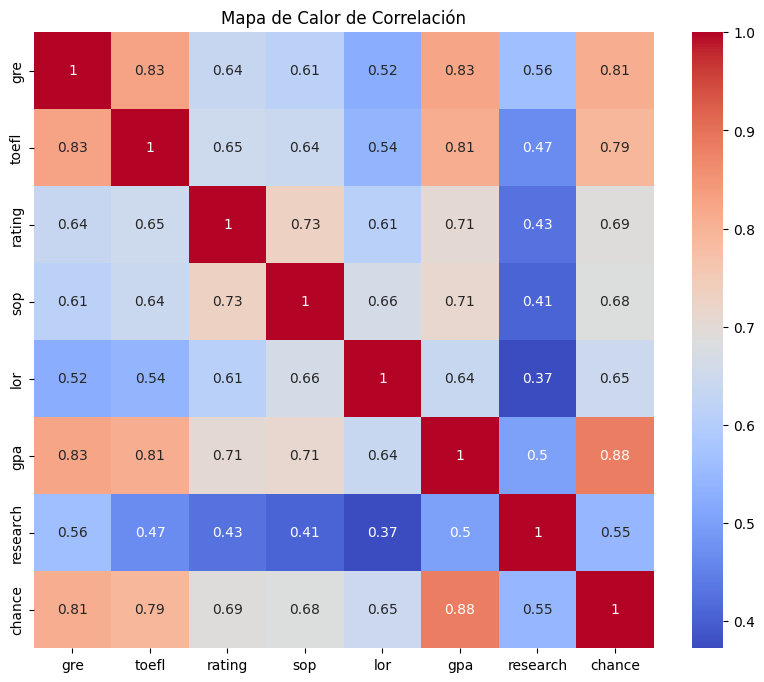

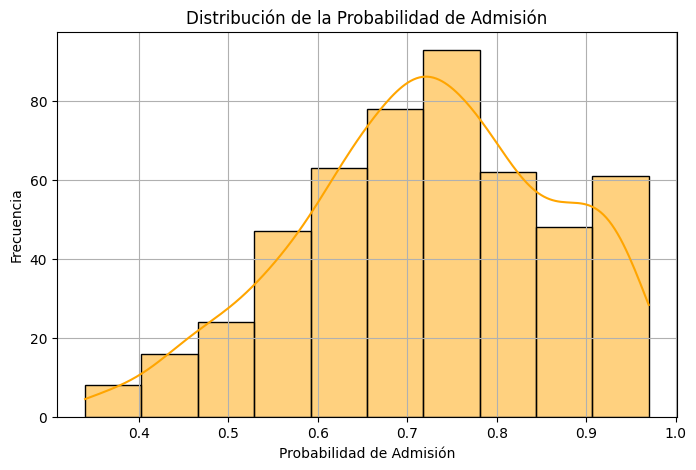

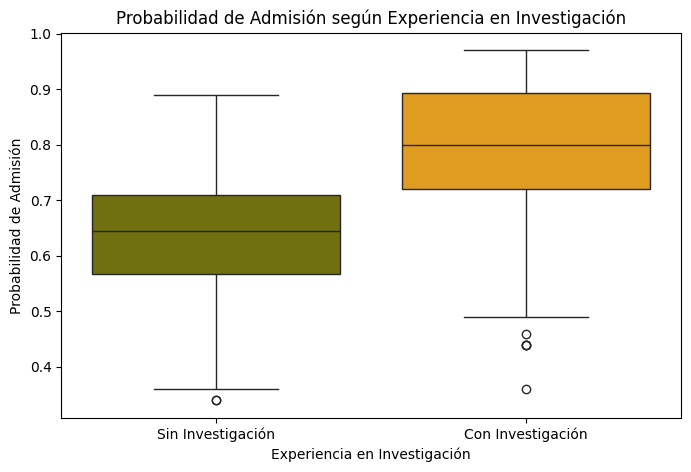

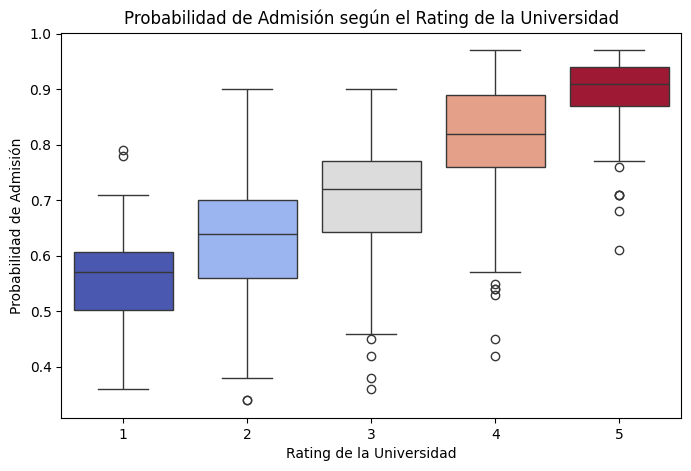

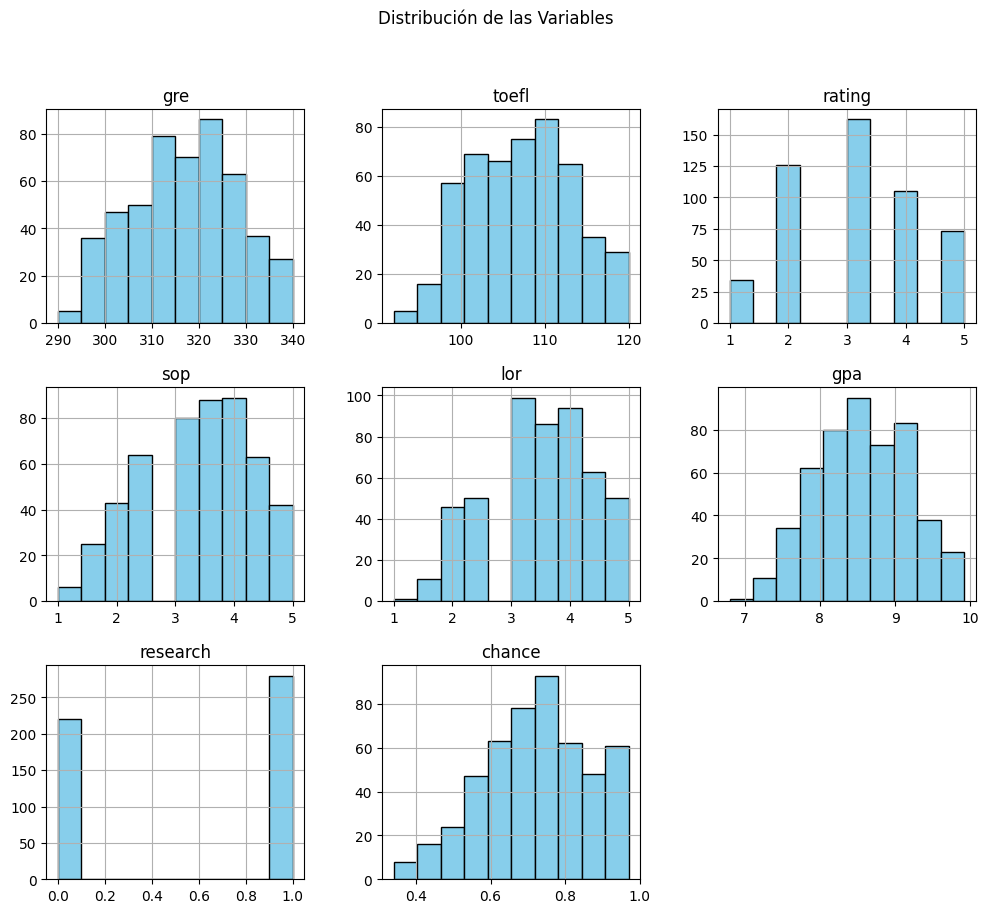

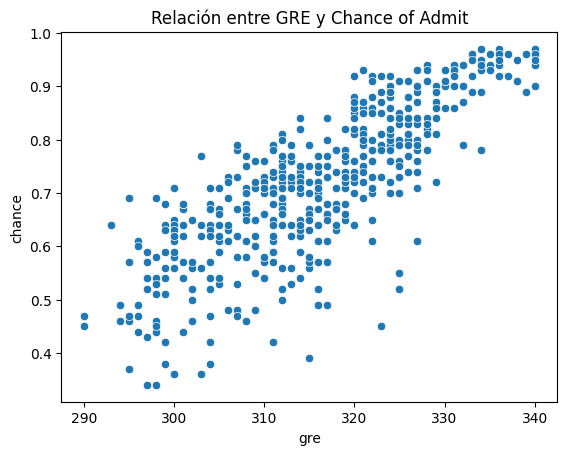

In [17]:
# Análisis de correlación (antes de transformar 'chance')
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

# **Visualización de datos**

# 🔸 Histograma de la probabilidad de admisión
plt.figure(figsize=(8, 5))
sns.histplot(df['chance'], bins=10, kde=True, color="orange")
plt.title('Distribución de la Probabilidad de Admisión')
plt.xlabel('Probabilidad de Admisión')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# 🔸 Comparación de chance de admisión entre estudiantes con o sin experiencia en investigación
plt.figure(figsize=(8, 5))
sns.boxplot(x="research", y="chance", hue="research", data=df, palette=["olive", "orange"], legend=False)
plt.xticks([0, 1], ["Sin Investigación", "Con Investigación"])
plt.title('Probabilidad de Admisión según Experiencia en Investigación')
plt.xlabel('Experiencia en Investigación')
plt.ylabel('Probabilidad de Admisión')
plt.show()

# 🔸 Boxplot de la calificación de la universidad frente a la probabilidad de admisión (corregido)
plt.figure(figsize=(8, 5))
sns.boxplot(x="rating", y="chance", hue="rating", data=df, palette="coolwarm", legend=False)
plt.title('Probabilidad de Admisión según el Rating de la Universidad')
plt.xlabel('Rating de la Universidad')
plt.ylabel('Probabilidad de Admisión')
plt.show()

# 🔸 Histogramas de todas las variables numéricas
df.hist(bins=10, figsize=(12, 10), color="skyblue", edgecolor="black")
plt.suptitle("Distribución de las Variables")
plt.show()


# Relación entre 'gre' y 'chance'
sns.scatterplot(x='gre', y='chance', data=df)
plt.title('Relación entre GRE y Chance of Admit')
plt.show()

	Determinar el conjunto de modelización y el de validación. 

In [18]:
# Transformar la variable 'chance' en categórica ('yes' si >= 0.6, 'no' en caso contrario)
df['chance'] = df['chance'].apply(lambda x: 'yes' if x >= 0.6 else 'no')

# Definir las variables predictoras y la variable objetivo
X = df.drop('chance', axis=1)
y = df['chance']

# Dividir el dataset en conjunto de modelización y conjunto de validación (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (400, 7)
Tamaño del conjunto de prueba: (100, 7)


	Aplicar uno o varios algoritmos para predecir la variable respuesta. 

In [19]:
# Aplicar Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("\nResultados del Árbol de Decisión:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Resultados del Árbol de Decisión:
[[11  8]
 [ 9 72]]
              precision    recall  f1-score   support

          no       0.55      0.58      0.56        19
         yes       0.90      0.89      0.89        81

    accuracy                           0.83       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.83      0.83      0.83       100



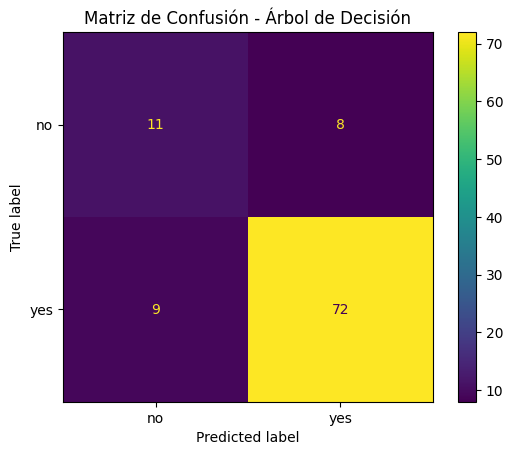

In [22]:
# Gráfico de la matriz de confusión para Árbol de Decisión
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test)
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

In [20]:
# Aplicar Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nResultados del Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Resultados del Random Forest:
[[12  7]
 [ 1 80]]
              precision    recall  f1-score   support

          no       0.92      0.63      0.75        19
         yes       0.92      0.99      0.95        81

    accuracy                           0.92       100
   macro avg       0.92      0.81      0.85       100
weighted avg       0.92      0.92      0.91       100



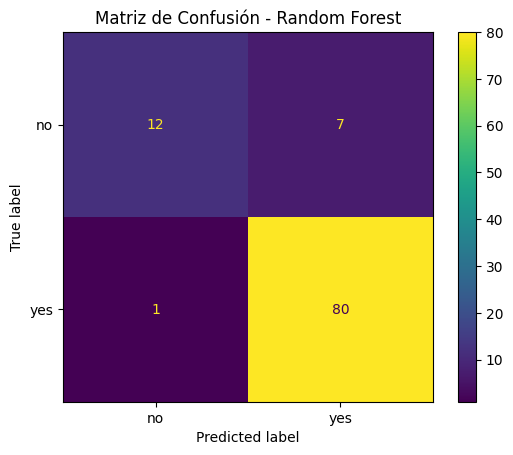

In [23]:
# Gráfico de la matriz de confusión para Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title('Matriz de Confusión - Random Forest')
plt.show()

	Comentar los resultados. 

In [25]:
# Comentarios sobre los resultados
print("\n### Comentarios sobre los resultados ###")
print("1. El modelo de Árbol de Decisión muestra una precisión y recall aceptables, pero podría ser propenso al sobreajuste.")
print("2. El modelo de Random Forest suele ser más robusto debido a la combinación de múltiples árboles, lo que reduce la varianza.")
print("3. La matriz de confusión nos muestra cuántas predicciones fueron correctas y cuántas fueron incorrectas en cada categoría.")
print("4. Si la precisión y recall son bajas, podemos considerar ajustar hiperparámetros o probar otros modelos como SVM o Gradient Boosting.")
print("5. Es importante evaluar el modelo en un conjunto de prueba para estimar su rendimiento en datos no vistos.")
print("6. La visualización de la matriz de confusión es útil para comprender mejor el rendimiento del modelo en cada clase.")




### Comentarios sobre los resultados ###
1. El modelo de Árbol de Decisión muestra una precisión y recall aceptables, pero podría ser propenso al sobreajuste.
2. El modelo de Random Forest suele ser más robusto debido a la combinación de múltiples árboles, lo que reduce la varianza.
3. La matriz de confusión nos muestra cuántas predicciones fueron correctas y cuántas fueron incorrectas en cada categoría.
4. Si la precisión y recall son bajas, podemos considerar ajustar hiperparámetros o probar otros modelos como SVM o Gradient Boosting.
5. Es importante evaluar el modelo en un conjunto de prueba para estimar su rendimiento en datos no vistos.
6. La visualización de la matriz de confusión es útil para comprender mejor el rendimiento del modelo en cada clase.
